In [109]:
import pandas as pd #For data 
import matplotlib.pyplot as plt#For graph or visualization plotting
import seaborn as sns #For visualization plotting
import numpy as np #For any mathematical operation
from sklearn.preprocessing import OrdinalEncoder #For encoding categorical varibles
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.linear_model import LogisticRegression #For importing Logistic Regression
from sklearn.metrics import confusion_matrix #To find prediction values using confusion matric
from sklearn.preprocessing import MinMaxScaler#For scaling

In [82]:
#Reading dataset
bank = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv', sep = ';',header = 0)

In [83]:
#Having a look at dataset
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Let's see what type of columns we have , int , object and so on.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Problem Statement
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [5]:
#Lets rename column y as Subscribe_Deposit=========> This is our target column

In [85]:
bank.rename(columns = {'y':'Subscribe_Deposit'}, inplace = True)

In [7]:
bank.head(n = 2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribe_Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [8]:
#Let's have a look at the  descriptive statisctics of the numerical columns
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Subscribe_Deposit    0
dtype: int64

#### Exploratory Data Analysis

In [10]:
#Lets have a look at the age group for which the data is collected

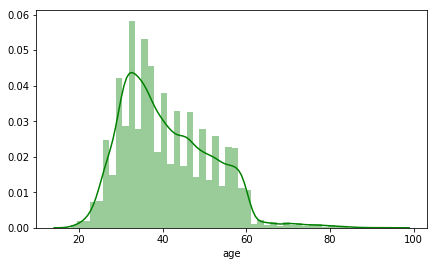

In [11]:
plt.figure(figsize = (7,4))
sns.distplot(bank['age'], bins = 50, color = 'green')

In [12]:
#Information acheived from above visualization
#Age is ranging from anywhere between 18 to 97 ---> Also confirmed from descriptive stats
#Age data is right skewed, So we have more people in the age group 25 to 38 
#Very few people with age less than 20 and greater than 60
#This makes sense as banking campaingns would genrally involve people in age group between 20 to 50

In [13]:
#Let's have a look at marital status

In [14]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [15]:
#Let's check marital status Vs Subscribed deposit

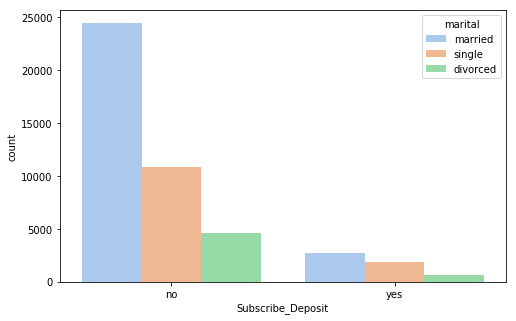

In [16]:
plt.figure(figsize = (8,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['marital'] ,data = bank, palette = "pastel")

In [17]:
#Information achieved from above visualization 
#Looks like more number of married people subscibe Yes for the deposit compaired to single and divorced people
# Also more number of people subscribed No for the deposit 

In [18]:
#Will now  consider the education feature

In [19]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [20]:
#Let's check marital status Vs Subscribed Deposit

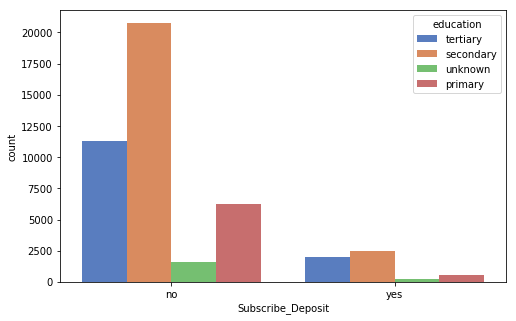

In [21]:
plt.figure(figsize = (8,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['education'], data = bank, palette = 'muted')

In [22]:
#Information achieved from above visulaization 
#More people irrespective of education status, did not subscribe for the term deposit
# Those who scubsribed yes, more number people subscribed from secondary education status

In [23]:
#Default - default: has credit in default? (categorical: 'no','yes','unknown')

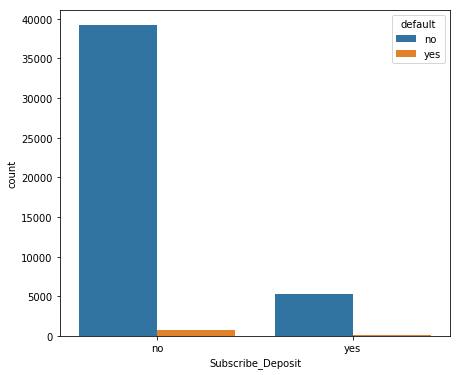

In [24]:
plt.figure(figsize = (7,6))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['default'], data = bank)

In [25]:
# Those who had credit in default they did not go for term deposit

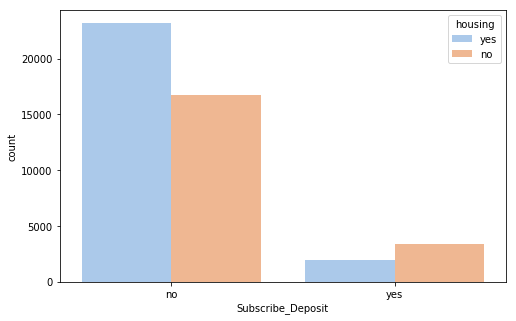

In [26]:
plt.figure(figsize = (8,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['housing'] ,data = bank, palette = "pastel")

In [27]:
#Those who had housing they opted deposit more compaired to the ones without housing

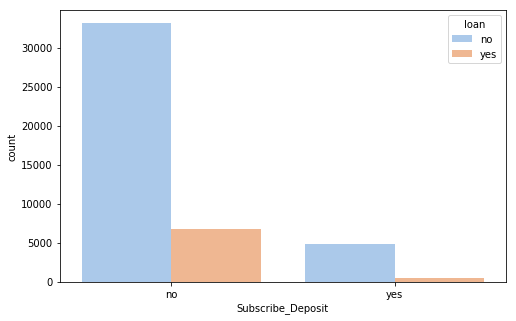

In [28]:
plt.figure(figsize = (8,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['loan'] ,data = bank, palette = "pastel")

In [29]:
#People who did not have loan were willing to go for depositing

In [30]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

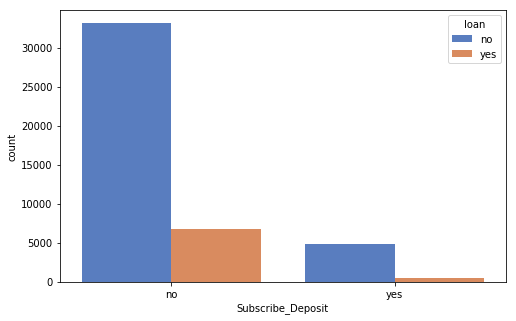

In [31]:
plt.figure(figsize = (8,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['loan'] ,data = bank, palette = "muted")

In [32]:
#People who did not have a loan subsribed yes more than the ones who had loan

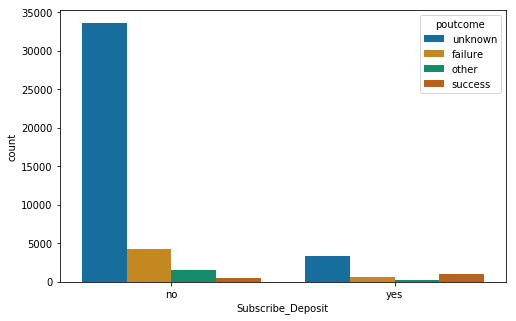

In [34]:
plt.figure(figsize = (8,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['poutcome'] ,data = bank, palette = "colorblind")

In [ ]:
#Now this is a confusing graph as poutcome,that is outcome of previous marketting strategy for subscribed yes is showing
#more for unknown---> This tells us that for people for whom we dont know the result of previous marketing strategy, 
#they were more likey to subscribe yes

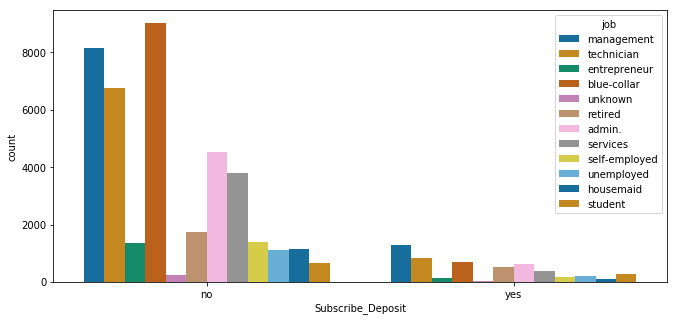

In [36]:
plt.figure(figsize = (11,5))
sns.countplot(x = bank['Subscribe_Deposit'], hue = bank['job'] ,data = bank, palette = "colorblind")

In [ ]:
#People from management job tend to subscribe yes more for deposit

In [56]:
#Duration
#UCI states that 
#duration: last contact duration, in seconds (numeric).
#Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
#Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#Thus, this input should only be included for benchmark purposes and should be discarded if the intention 
#is to have a realistic predictive model.

In [ ]:
# Lets see the graph for duration where Subscribe deposit was Yes

In [45]:
#Creating a new dataframe for duration and subscribe deposit
just_for_duration = pd.DataFrame(data = bank, columns = ['duration', 'Subscribe_Deposit'])

In [51]:
#Collecting only those where subscribe to deposit was Yes
just_for_duration.drop(just_for_duration[just_for_duration['Subscribe_Deposit'] == 'no'].index, inplace = True)

In [54]:
just_for_duration['duration'].min()

8

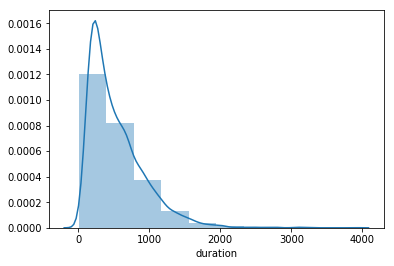

In [58]:
sns.distplot(just_for_duration['duration'], bins = 10)

In [ ]:
#This means that for maximum people who subscribed to Yes, The marketing team required a call duration between 8 to 800 seconds

### Feature Engineering

In [ ]:
# Lets convert categorical data into numerical using Ordiinal Encoder

In [62]:
cat_bank_data = bank.select_dtypes(include = ['object'])

In [61]:
oe = OrdinalEncoder()

In [63]:
data_td = oe.fit_transform(cat_bank_data)

In [65]:
cat_bank = pd.DataFrame(data_td, columns = list(cat_bank_data.columns.values))

In [74]:
cat_bank.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Subscribe_Deposit
0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0


In [88]:
bank.drop(cat_bank, axis = 1, inplace = True)

In [89]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [91]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [94]:
cat_bank.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Subscribe_Deposit
0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0


In [96]:
#Merging numerical and categorica; data

In [92]:
bank_df = pd.concat([bank, cat_bank], axis = 1)

In [95]:
bank_df.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Subscribe_Deposit
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,44,29,5,151,1,-1,0,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,33,2,5,76,1,-1,0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,47,1506,5,92,1,-1,0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,33,1,5,198,1,-1,0,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0


#### Splitting the data into train and test and Scaling

In [98]:
x = bank_df.drop('Subscribe_Deposit', axis = 1)

In [112]:
cols = ['age','balance','day','duration','campaign','pdays','previous','job','marital','education','default','housing','loan','contact','month','poutcome']

In [110]:
m = MinMaxScaler()

In [111]:
x = m.fit_transform(x)

C:\Users\chaitali.acharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [113]:
x = pd.DataFrame(x, columns = [cols])

In [114]:
y = bank_df['Subscribe_Deposit']

In [115]:
#X_train, X_test, y_train, y_test = train_test_spli(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

#### Applying Logistic Regression

In [116]:
log_reg = LogisticRegression()

In [117]:
log_reg.fit(X_train, y_train)

C:\Users\chaitali.acharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
prediction = log_reg.predict(X_test)

In [119]:
log_reg.score(X_train, y_train)

0.8911227757419695

#### Confusion matrix

In [120]:
confusion_matrix(y_test, prediction)

array([[12956,   219],
       [ 1424,   321]], dtype=int64)